# Time Series Analysis

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.dates as mdates
import seaborn as sn
import os
import datetime
import xarray as xr
import rioxarray
from math import comb, log
plt.style.use("ggplot")
import statsmodels.api as sm
from functions import *

In [2]:
data = pd.read_csv("wildfire_data.csv", index_col=0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.columns

Index(['incident_acres_burned', 'RX_acres', 'RX_acres_3_month',
       'RX_acres_6_month', 'RX_acres_9_month', 'RX_acres_12_month',
       'soil moisture', 'temp_avg_Value', 'temp_avg_Anomaly', 'temp_min_Value',
       'temp_min_Anomaly', 'temp_max_Value', 'temp_max_Anomaly',
       'precip_new_Value', 'precip_new_Anomaly', 'pdsi_Value', 'pdsi_Anomaly',
       'phdi_Value', 'phdi_Anomaly', 'pmdi_Value', 'pmdi_Anomaly', 'pzi_Value',
       'pzi_Anomaly', 'cooling_daysValue', 'cooling_daysAnomaly',
       'heating_daysValue', 'heating_daysAnomaly'],
      dtype='object')

# Monthly Analysis

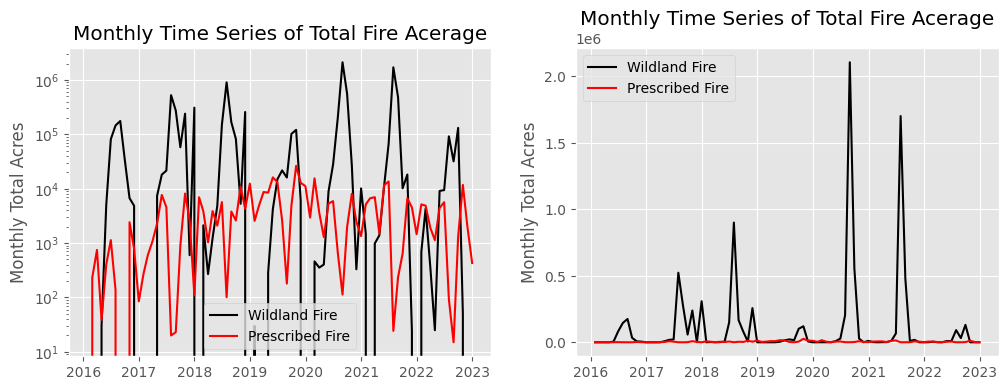

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(data['incident_acres_burned'], color='black', label='Wildland Fire')
ax1.plot(data["RX_acres"], color='red', label='Prescribed Fire')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.set_title("Monthly Time Series of Total Fire Acerage")
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel('Monthly Total Acres')

ax2.plot(data['incident_acres_burned'], color='black', label='Wildland Fire')
ax2.plot(data["RX_acres"], color='red', label='Prescribed Fire')
ax2.xaxis.set_major_locator(mdates.YearLocator()) # check the axis - might be incorrect
ax2.set_title("Monthly Time Series of Total Fire Acerage")
ax2.legend()
ax2.set_ylabel('Monthly Total Acres') # power spectrum
plt.show()

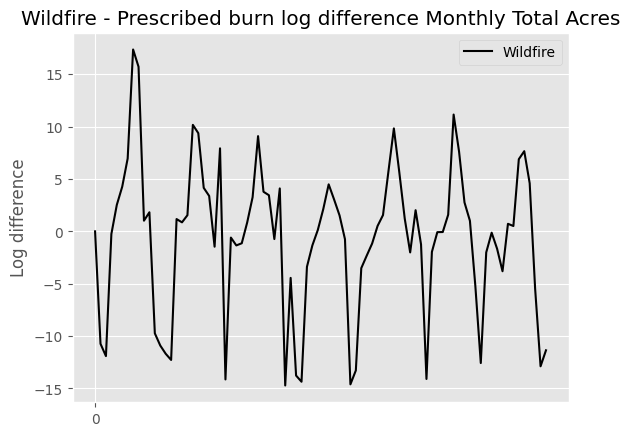

In [6]:
fig, ax = plt.subplots()
l1 = np.array([log(i+0.005) for i in data['incident_acres_burned'].tolist()])
l2 = np.array([log(j+0.005) for j in data["RX_acres"].tolist()])
log_diff = np.subtract(l1, l2)
ax.plot([i for i in range(len(log_diff))], log_diff, color='black', label='Wildfire')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_title("Wildfire - Prescribed burn log difference Monthly Total Acres")
ax.legend()
#ax.set_yscale('log')
ax.set_ylabel('Log difference')
plt.show()

## Time Series of Single Variables

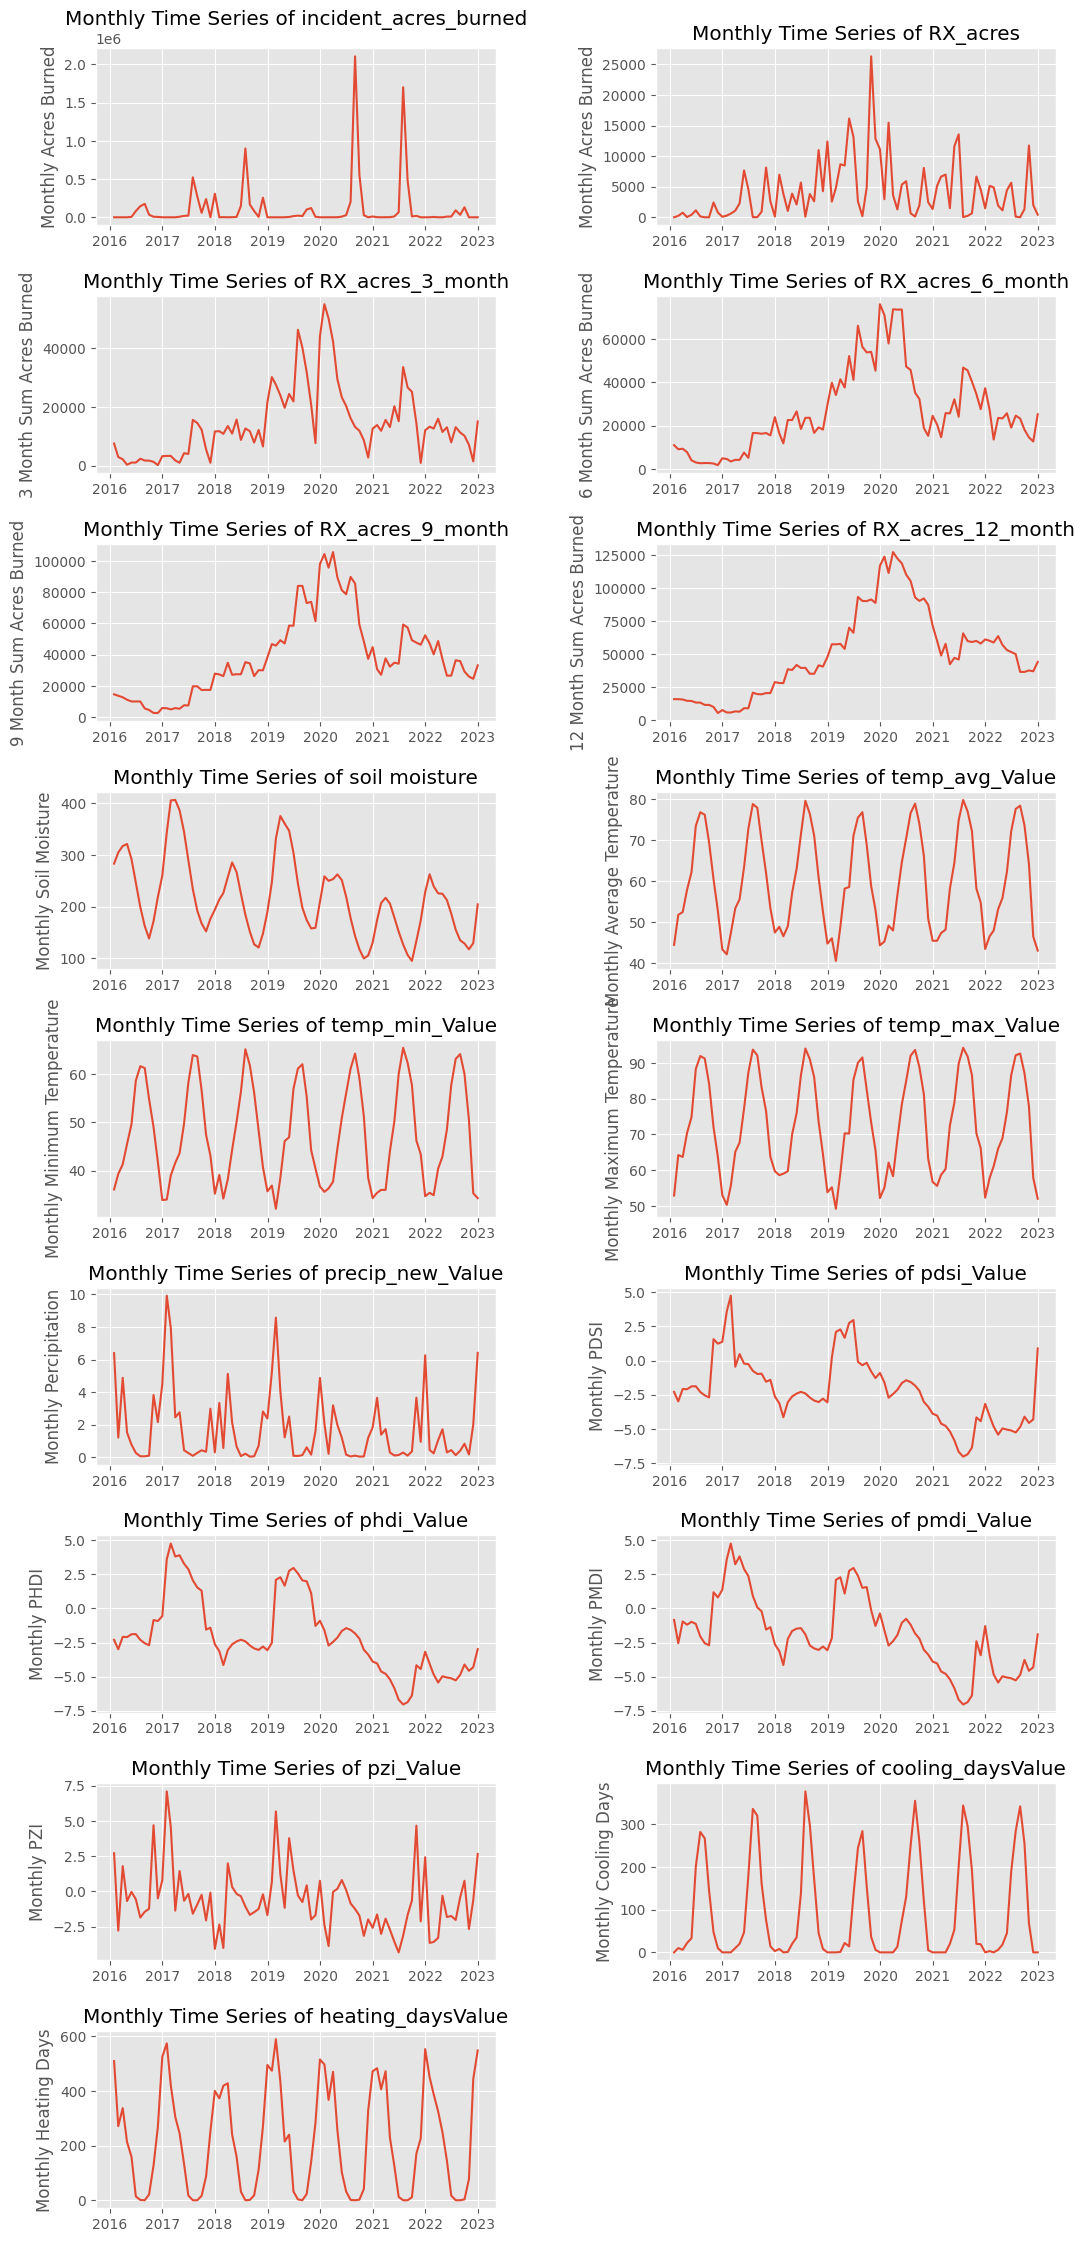

In [7]:
ylabs = ["Monthly Acres Burned", "Monthly Acres Burned", "3 Month Sum Acres Burned", "6 Month Sum Acres Burned",
         "9 Month Sum Acres Burned", "12 Month Sum Acres Burned","Monthly Soil Moisture",
         "Monthly Average Temperature", "Monthly Minimum Temperature", "Monthly Maximum Temperature", "Monthly Percipitation",
         "Monthly PDSI",  "Monthly PHDI",  "Monthly PMDI",  "Monthly PZI", "Monthly Cooling Days", "Monthly Heating Days"]
logs = [False] +[False for i in range(1, len(ylabs))]
cols = [col for col in data.columns if "Anomaly" not in col]
_ = graph_timeseries(data, cols, logs, ylabs)

## Auto Correlation

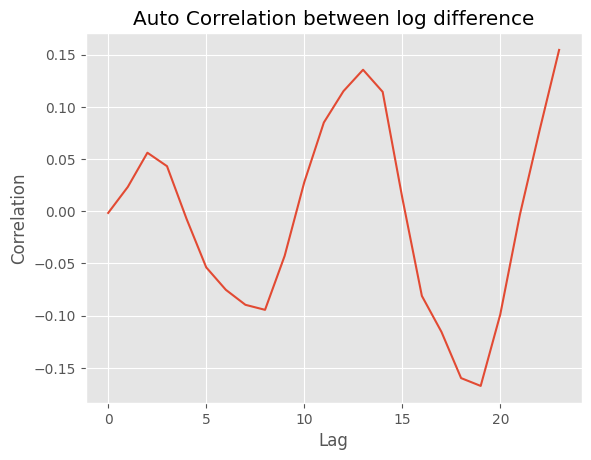

In [8]:
corr = sm.tsa.stattools.ccf(log_diff, log_diff, adjusted=False)

# Remove padding and reverse the order
corrs = corr[0:(len(log_diff)+1)][::-1][:24]
plt.plot(corrs)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.title("Auto Correlation between log difference") # not much auto correlation
plt.show()

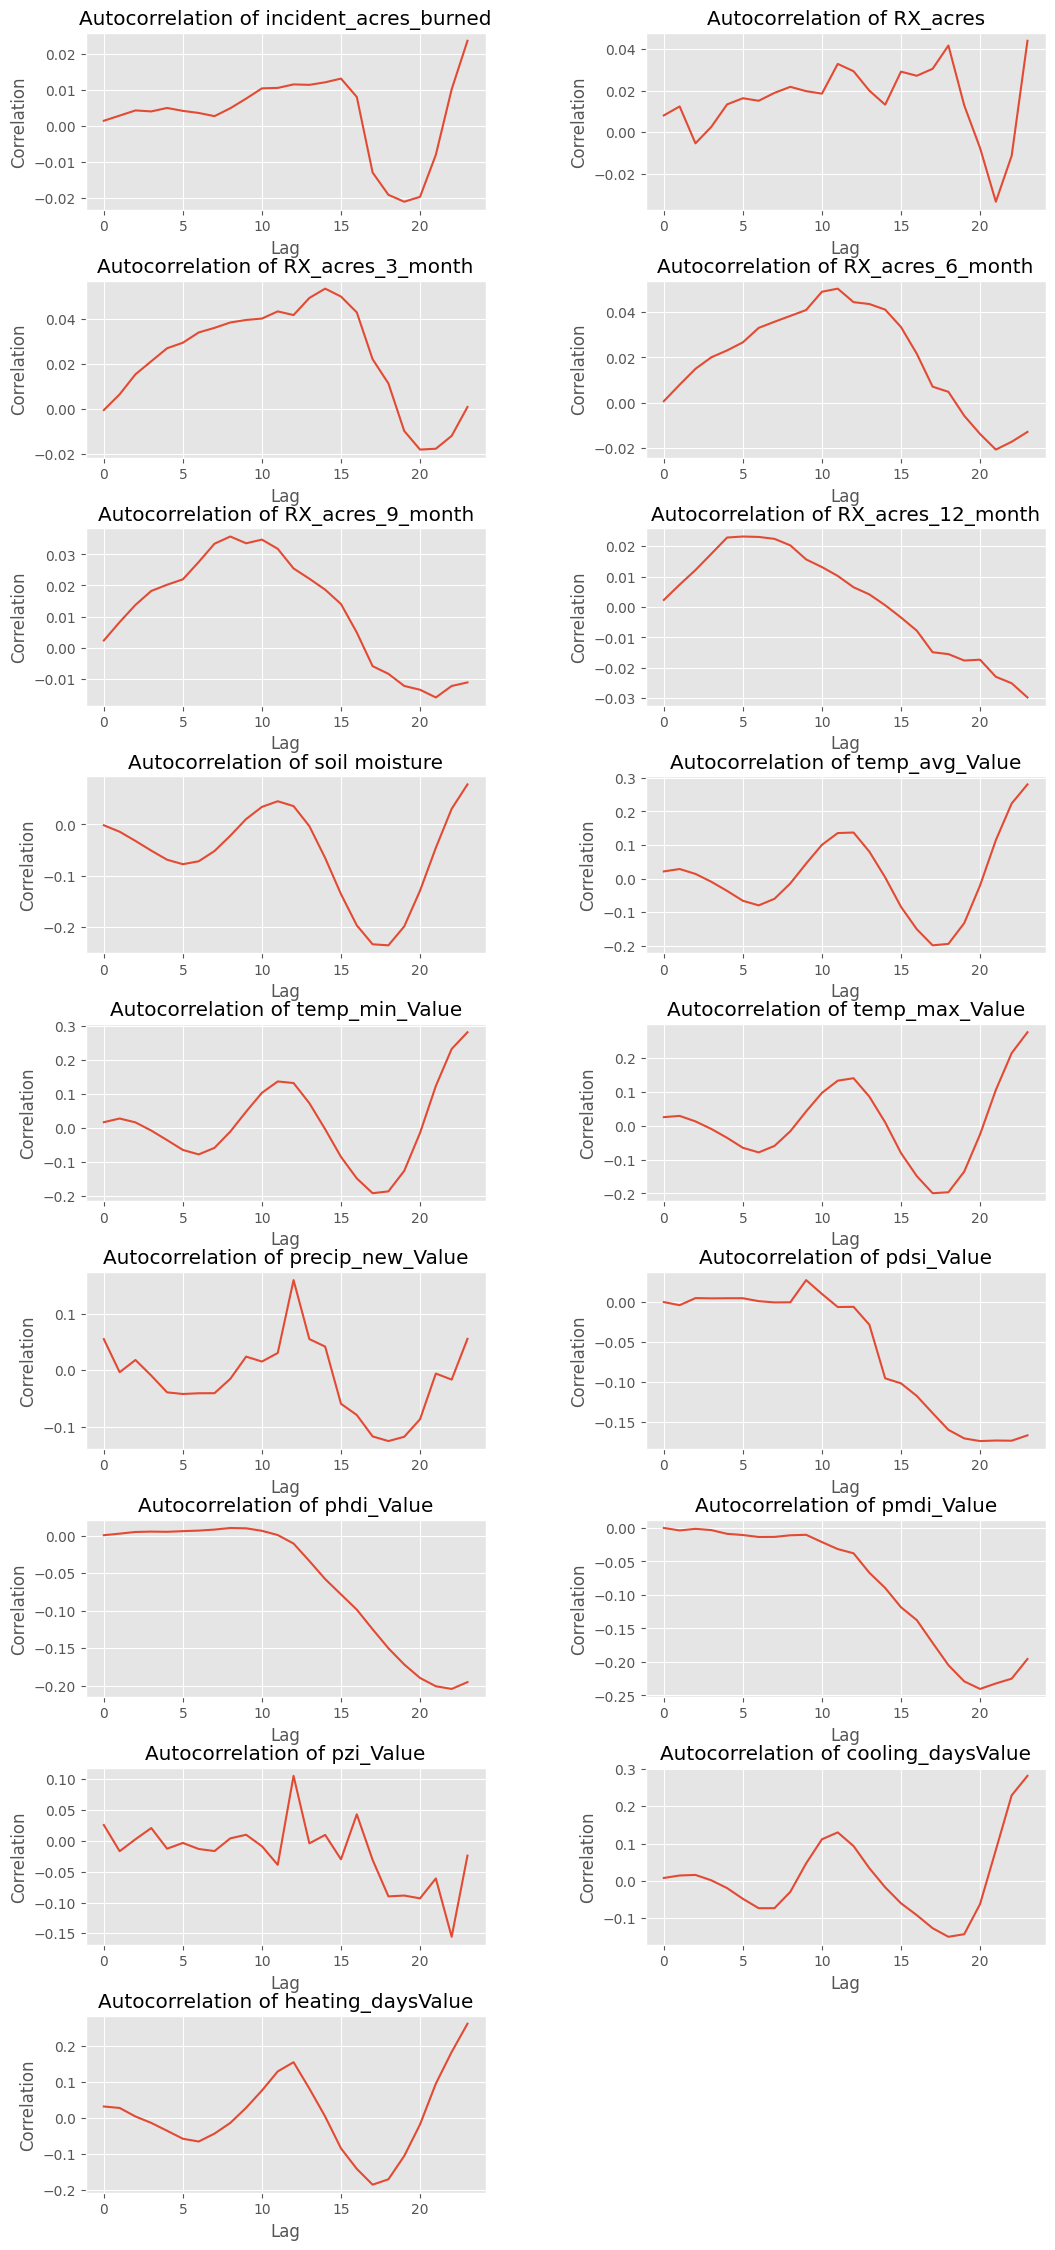

,incident_acres_burned,RX_acres,RX_acres_3_month,RX_acres_6_month,RX_acres_9_month,RX_acres_12_month,soil moisture,temp_avg_Value,temp_min_Value,temp_max_Value,precip_new_Value,pdsi_Value,phdi_Value,pmdi_Value,pzi_Value,cooling_daysValue,heating_daysValue
best lag,23.000,23.000,14.000,11.000,8.000,5.000,23.000,23.000,23.000,23.000,12.000,9.000,8.000,0.00,12.000,23.000,23.000
min R,-0.021,-0.033,-0.018,-0.021,-0.016,-0.030,-0.236,-0.198,-0.191,-0.199,-0.125,-0.173,-0.204,-0.24,-0.156,-0.151,-0.186
max R,0.024,0.044,0.053,0.050,0.036,0.023,0.078,0.280,0.281,0.276,0.159,0.027,0.010,-0.00,0.105,0.282,0.262


In [9]:
_, df = autocorrelations(data, cols)
df

## Cross Correlation

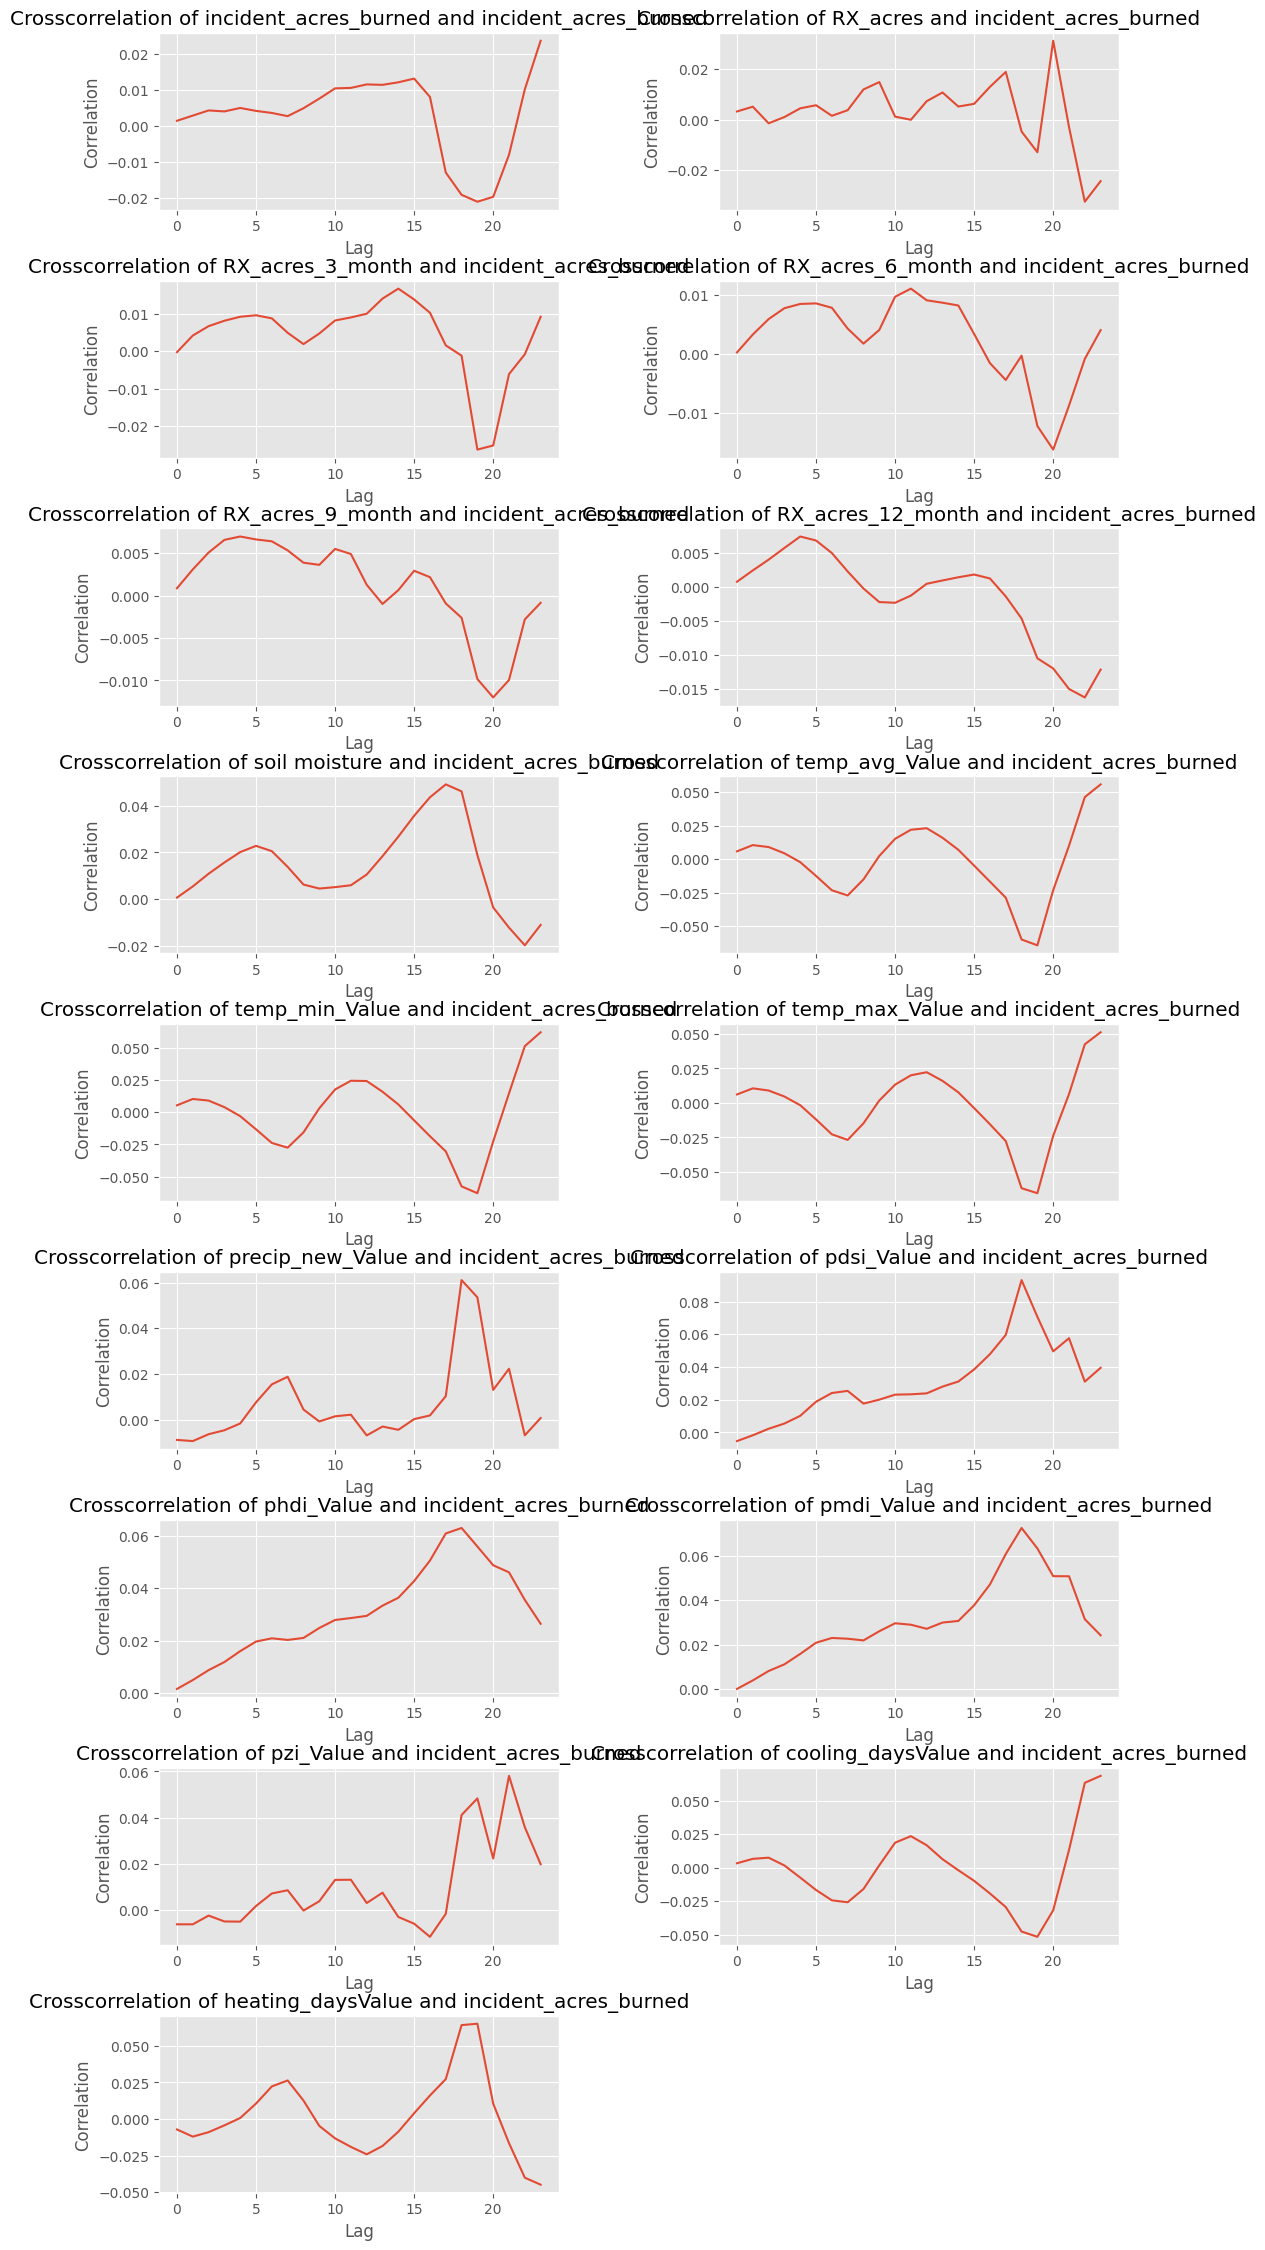

,"(incident_acres_burned, incident_acres_burned)","(RX_acres, incident_acres_burned)","(RX_acres_3_month, incident_acres_burned)","(RX_acres_6_month, incident_acres_burned)","(RX_acres_9_month, incident_acres_burned)","(RX_acres_12_month, incident_acres_burned)","(soil moisture, incident_acres_burned)","(temp_avg_Value, incident_acres_burned)","(temp_min_Value, incident_acres_burned)","(temp_max_Value, incident_acres_burned)","(precip_new_Value, incident_acres_burned)","(pdsi_Value, incident_acres_burned)","(phdi_Value, incident_acres_burned)","(pmdi_Value, incident_acres_burned)","(pzi_Value, incident_acres_burned)","(cooling_daysValue, incident_acres_burned)","(heating_daysValue, incident_acres_burned)"
best lag,23.000,20.000,14.000,11.000,4.000,4.000,17.000,23.000,23.000,23.000,18.000,18.000,18.000,18.000,21.000,23.000,19.000
min R,-0.021,-0.032,-0.026,-0.016,-0.012,-0.016,-0.020,-0.065,-0.063,-0.065,-0.009,-0.005,0.001,0.000,-0.011,-0.052,-0.045
max R,0.024,0.031,0.017,0.011,0.007,0.007,0.049,0.056,0.062,0.051,0.061,0.093,0.063,0.073,0.058,0.068,0.065


In [10]:
_, res = crosscorrelations_target(data, cols, "incident_acres_burned")
res

# Annual Analysis: Pearson R correlation

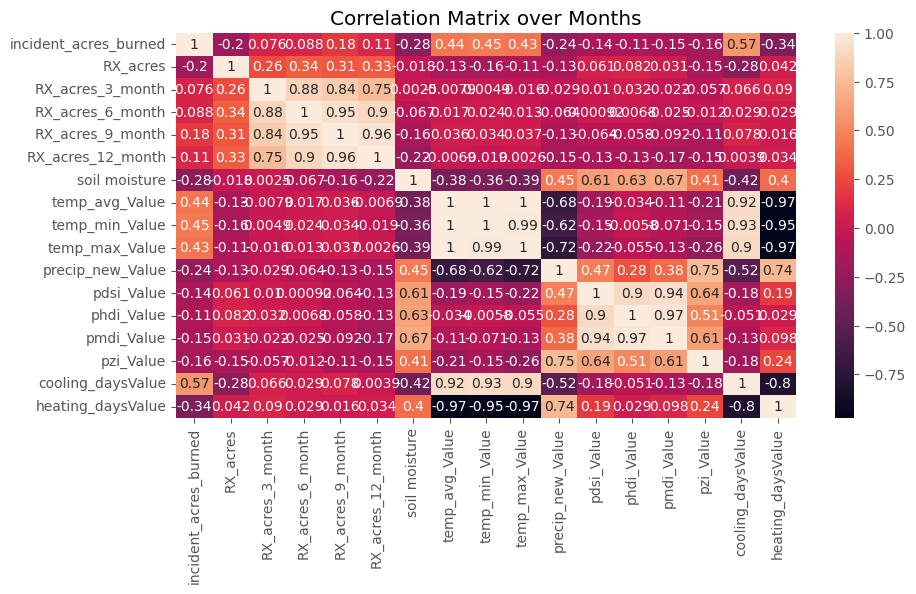

In [11]:
corr_matrix = data[cols].corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix over Months")
plt.show()

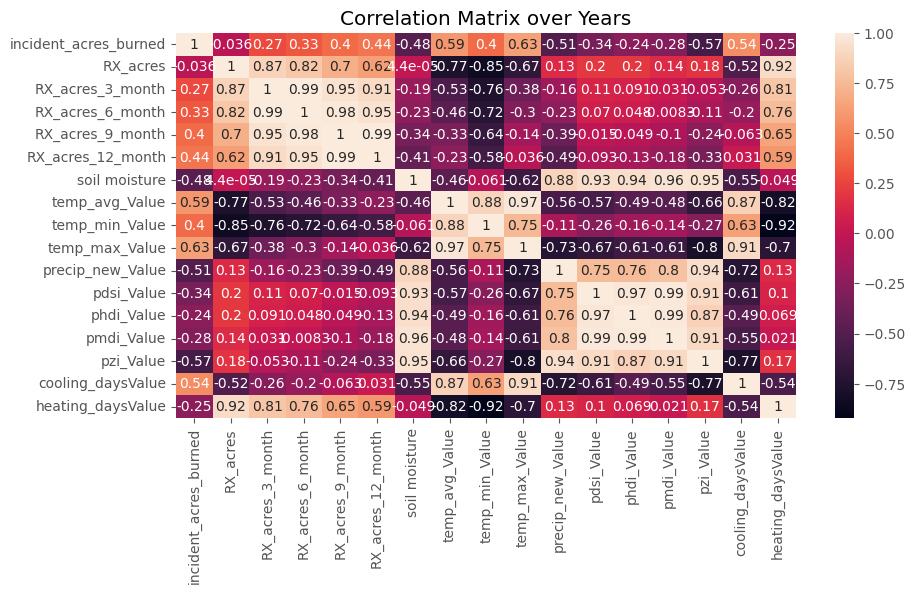

In [12]:
annual = data[cols].resample('Y').sum()
corr_matrix = annual.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix over Years")
plt.show()

# Log target

In [13]:
data["log_acres"] = np.log(data['incident_acres_burned'].replace(0, np.nan)).replace(np.nan, 0)
cols.remove('incident_acres_burned')
cols.remove('heating_daysValue')
cols.remove('cooling_daysValue')
cols =  cols + ["log_acres"]

In [14]:
#_, res = crosscorrelations_target(data, cols, "log_acres")
#res

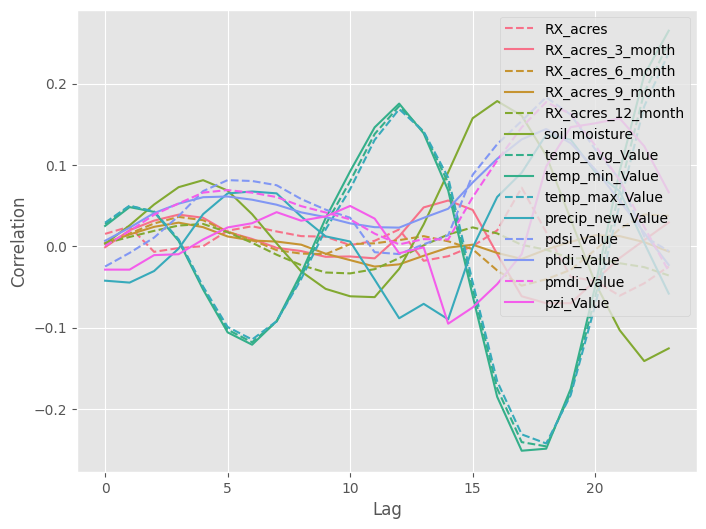

In [15]:
_, res = crosscorrelations_target_single_plot(data, cols, "log_acres")

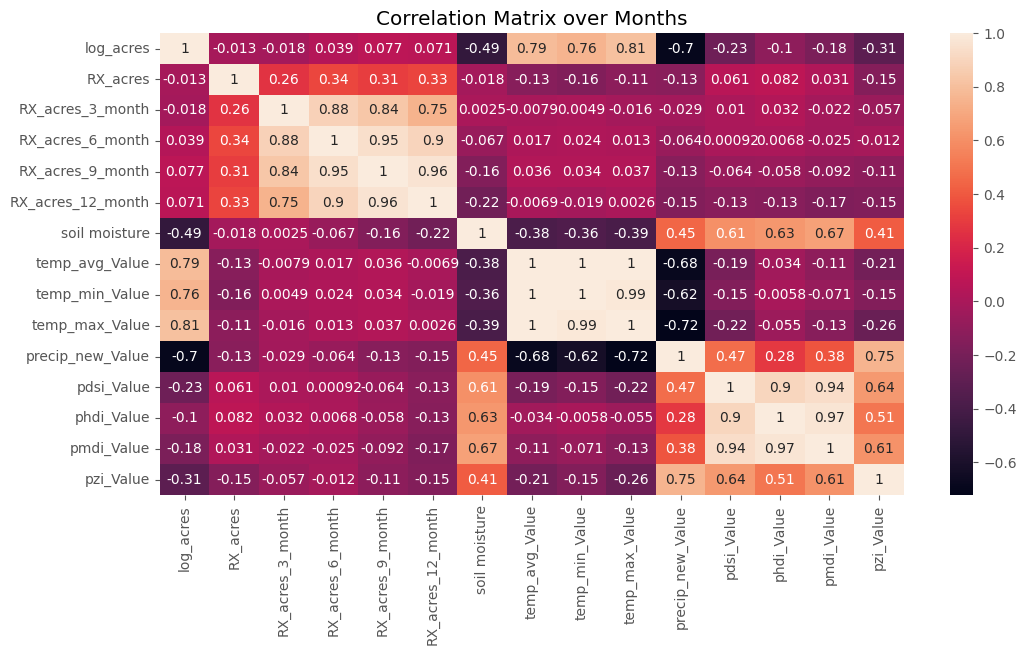

In [16]:
corr_matrix = data[["log_acres"]+cols[:-1]].corr()
plt.figure(figsize=(12,6))
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix over Months")
plt.show()